<a href="https://colab.research.google.com/github/AyeshaIjazTabassum/PythonAIBootcamp/blob/main/Day13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Session**

# Unsupervised Learning

This notebook covers beginner-friendly coding examples for unsupervised learning:

- K-Means Clustering
- Hierarchical Clustering
- Dimensionality Reduction (PCA)



In [1]:
# Install (Colab usually has these preinstalled)
# !pip install scikit-learn matplotlib pandas seaborn

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Sample Dataset (Iris)
We will use the classic **Iris dataset**, commonly used for clustering demos.

In [2]:
iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## K-Means Clustering
K-Means groups similar data points into **K clusters**.

In [11]:
k = 3 # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

print("Cluster labels assigned!")

Cluster labels assigned!


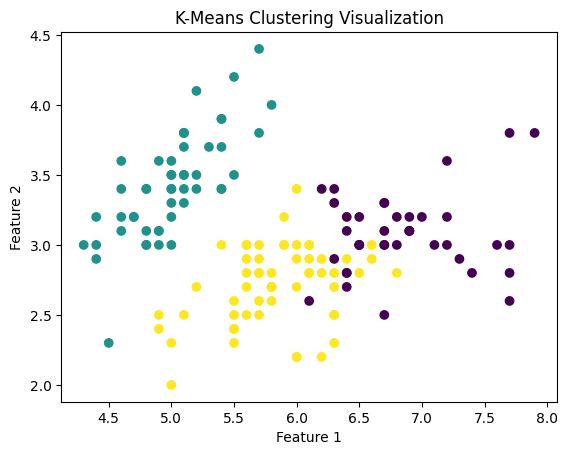

In [12]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Visualization")
plt.show()

## Hierarchical Clustering
This clustering builds a hierarchy (tree-like structure) of clusters.

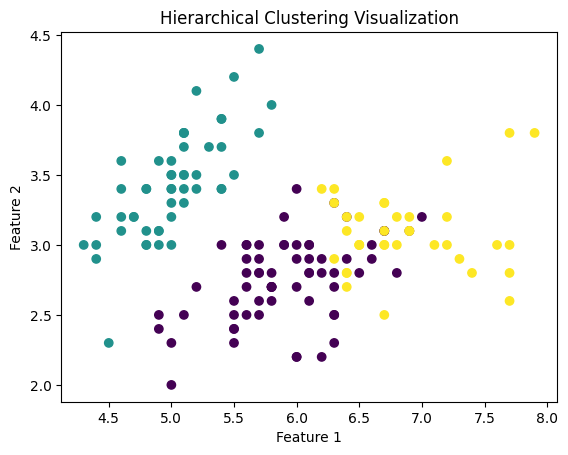

In [13]:
hier = AgglomerativeClustering(n_clusters=3)
hier_labels = hier.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=hier_labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hierarchical Clustering Visualization")
plt.show()

## Dimensionality Reduction using PCA
PCA reduces high-dimensional data into **2 dimensions** for visualization.

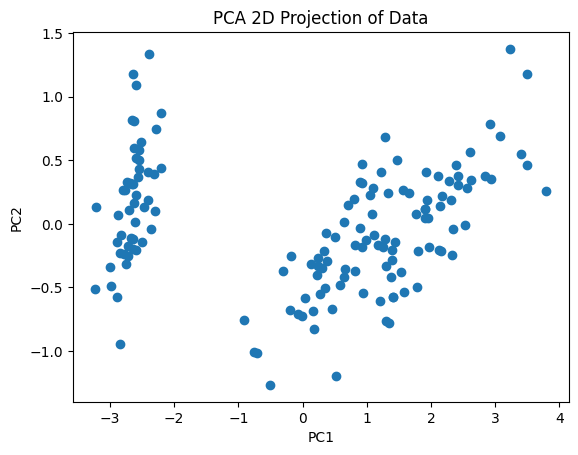

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Projection of Data")
plt.show()

## Summary
In this notebook, you practiced:

- Clustering using K-Means
- Hierarchical clustering
- Visualizing high-dimensional data with PCA

These are the core coding concepts for **unsupervised learning** in beginner bootcamps.

# **Self Practice Question**

# Association algorithm : Apriori

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# sample shopping data
data = {
    'Milk': [1, 1, 0, 1, 0],
    'Bread': [1, 1, 1, 0, 1],
    'Butter': [0, 1, 1, 1, 0],
    'Eggs': [1, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

# find frequent itemsets
frequent_items = apriori(df, min_support=0.4, use_colnames=True)

# generate rules
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.6)

print(rules[['antecedents', 'consequents', 'support', 'confidence']])

  antecedents consequents  support  confidence
0      (Milk)     (Bread)      0.4    0.666667
1    (Butter)      (Milk)      0.4    0.666667
2      (Milk)    (Butter)      0.4    0.666667
3      (Milk)      (Eggs)      0.4    0.666667
4    (Butter)     (Bread)      0.4    0.666667
5     (Bread)      (Eggs)      0.6    0.750000
6      (Eggs)     (Bread)      0.6    0.750000
7    (Butter)      (Eggs)      0.4    0.666667


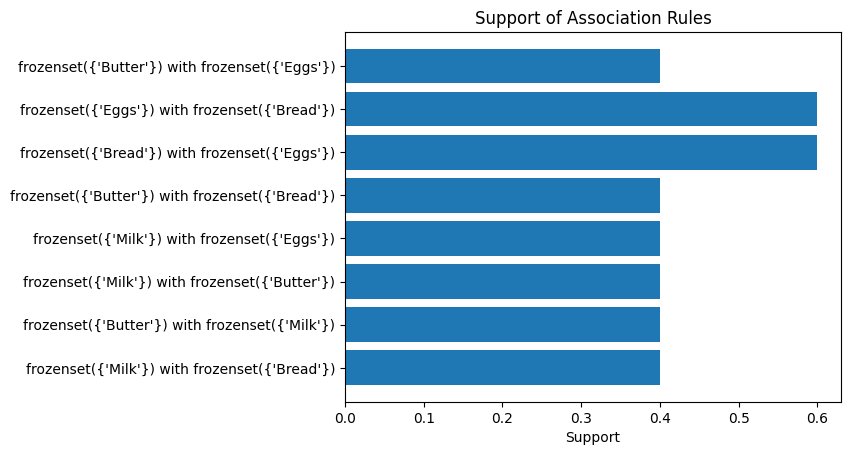

In [21]:
import matplotlib.pyplot as plt

# convert antecedents & consequents to strings for plotting
rules['rule'] = rules['antecedents'].astype(str) + " with " + rules['consequents'].astype(str)

plt.figure()
plt.barh(rules['rule'], rules['support'])
plt.xlabel("Support")
plt.title("Support of Association Rules")
plt.show()